# Early Disease Detection

## Overview
 Cardiovascular diseases (CVDs), including heart disease, are the leading cause of death
 worldwide. Early detection of heart disease is critical for preventing serious health outcomes
 and improving the quality of life for patients. With the increasing availability of medical data,
 machine learning models can be used to predict whether a patient is likely to develop heart
 disease based on certain health indicators.
 In this project, you will build a classification model to predict whether an individual is likely to
 have heart disease or not. The dataset provided includes various health and demographic
 factors such as age, blood pressure, cholesterol levels, and lifestyle habits (e.g., smoking
and alcohol consumption). The goal is to train a model to identify which individuals have
 heart disease based on these features

## Problem Statement
 You are provided with a dataset that contains health-related information about individuals.
 Your task is to develop a machine learning model that can predict the presence of heart
 disease based on the provided features. The target variable in the dataset is "disease,"
 which indicates whether a person has heart disease (1) or not (0)


### We need to perform the following tasks:
 Data Exploration and Preprocessing: Understand the dataset, handle missing values, perform feature engineering if necessary, and prepare the data for model training.

 Model Development: Train a classification model to predict the presence of heart disease using the features provided in the dataset.

 Model Evaluation: Evaluate the model’s performance using appropriate classification metrics such as accuracy, precision, recall, and F1-score. Identify the best-performing model based
 on these metrics.

 Insights and Reporting: Analyze the results and provide insights into which factors are the most significant predictors of heart disease

This notebook covers:

Data loading 

Exploratory Data Analysis (EDA)

Data Preprocessing

Model Training (Logistic Regression, Decision Tree, SVM, Random Forest)

Model Evaluation (Accuracy, Precision, Recall, F1-Score)

Feature Importance and Insights


### Data loading

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Google Sheets CSV export link
csv_url = "https://docs.google.com/spreadsheets/d/10k1aWfHrvoXJrHxMz6F2nfK5-UlkCmQ8EjhUt9Casso/export?format=csv&gid=707957796"

# Read the data into a DataFrame
df = pd.read_csv(csv_url)




Checking if datafile is imported or not

In [30]:
# Display the first few rows
print("\nFirst few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


Datainfo

In [31]:
# Data info
print("\nData info:")
df.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


Missing values

In [32]:

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64


Statistical summary

In [33]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


## Exploratory Data Analysis EDA

In [34]:
# Drop columns not needed for EDA (e.g., 'date', 'id')
eda_df = df.drop(['date', 'id'], axis=1)

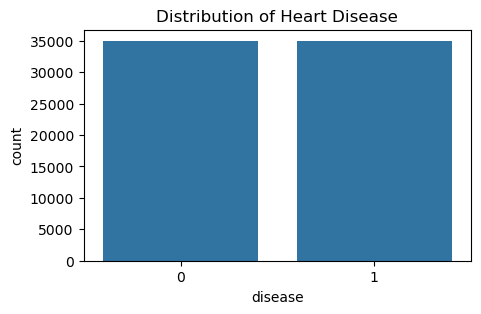

In [35]:
# Target variable distribution
plt.figure(figsize=(5,3))
sns.countplot(x='disease', data=eda_df)
plt.title('Distribution of Heart Disease')
plt.show()

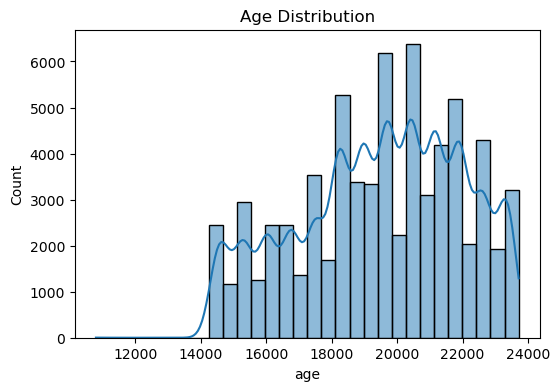

In [36]:
# Distribution of age
plt.figure(figsize=(6,4))
sns.histplot(eda_df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


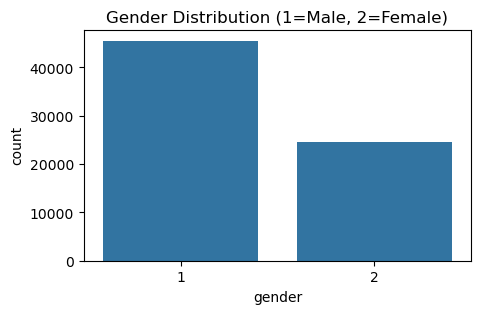

In [37]:
# Gender distribution
plt.figure(figsize=(5,3))
sns.countplot(x='gender', data=eda_df)
plt.title('Gender Distribution (1=Male, 2=Female)')
plt.show()

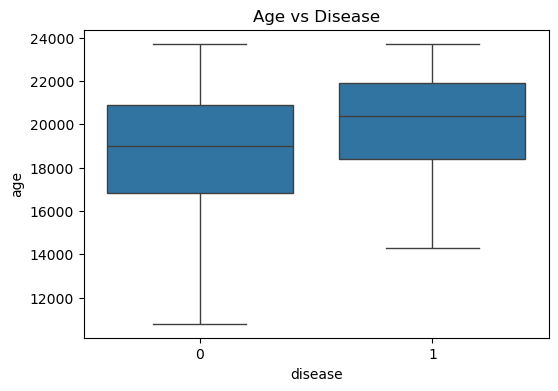

In [38]:
# Boxplot: Age vs Disease
plt.figure(figsize=(6,4))
sns.boxplot(x='disease', y='age', data=eda_df)
plt.title('Age vs Disease')
plt.show()


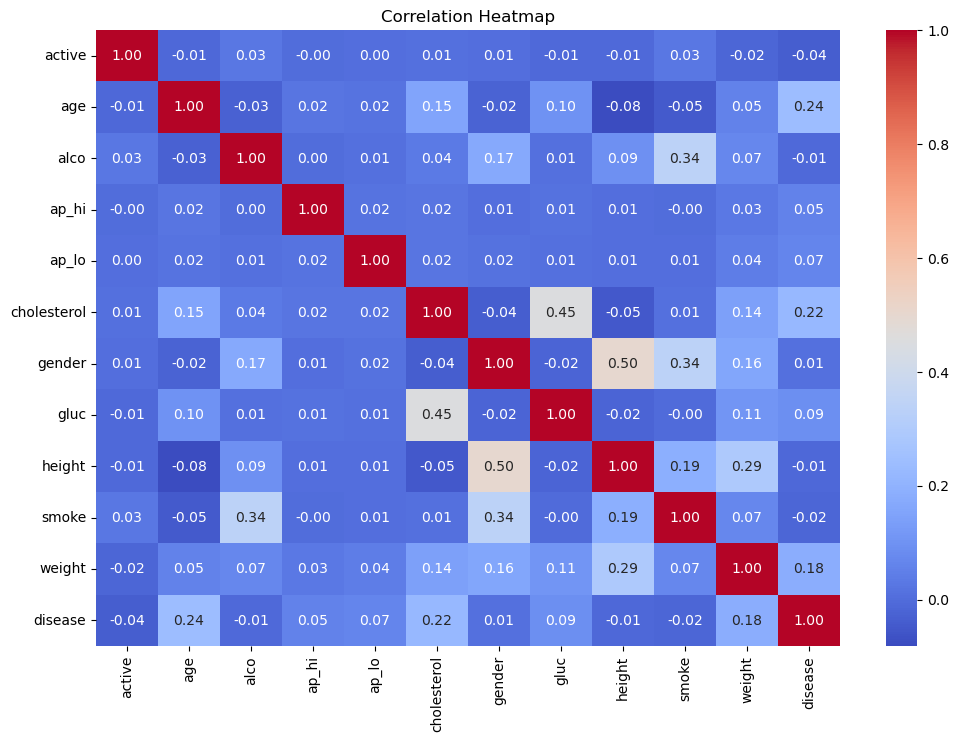

In [39]:
# Correlation heatmap
# Correlation heatmap (numeric columns only)
import numpy as np
numeric_df = eda_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

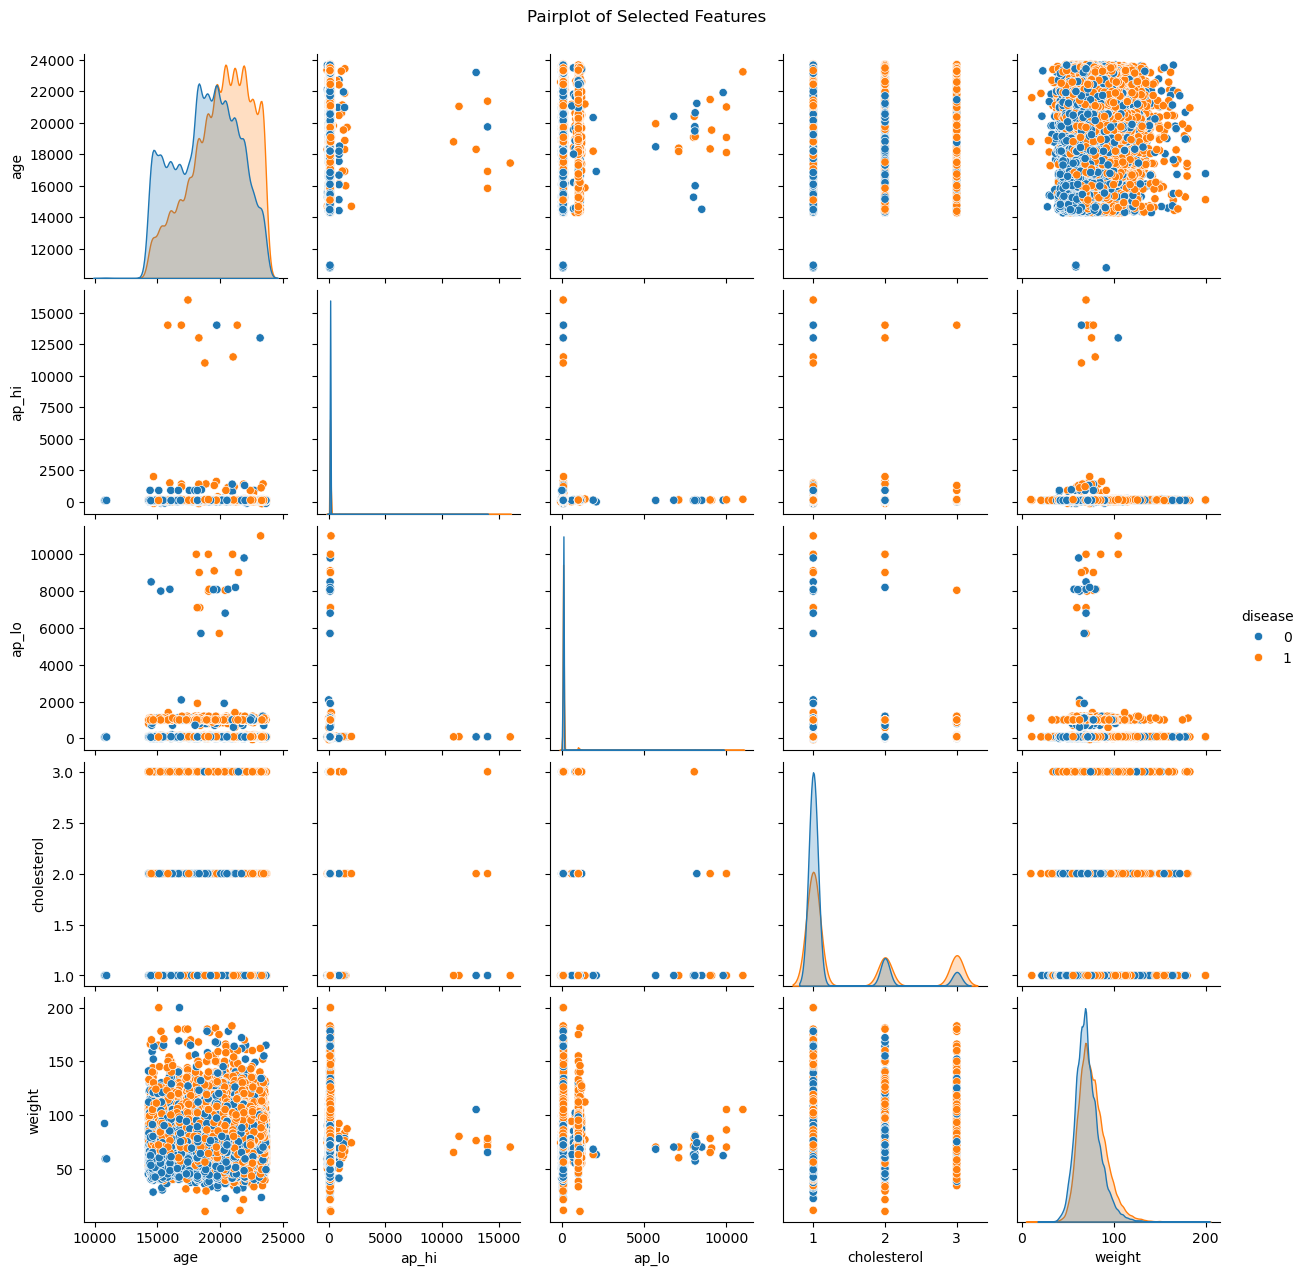

In [40]:
# Make sure all selected features exist and are numeric
selected_features = ['age', 'ap_hi', 'ap_lo', 'cholesterol', 'weight', 'disease']

# Drop rows with missing values in selected features
pairplot_df = eda_df[selected_features].dropna()

# Ensure all columns are numeric (convert if necessary)
for col in selected_features:
    pairplot_df[col] = pd.to_numeric(pairplot_df[col], errors='coerce')

# Drop any rows that became NaN after conversion
pairplot_df = pairplot_df.dropna()

# Now plot
sns.pairplot(pairplot_df, hue='disease')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## Data Preprocessing

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Handle missing values (drop rows with any missing values)
df_clean = eda_df.dropna().copy()

# 2. Encode categorical variables
# Encode 'country'
le_country = LabelEncoder()
df_clean['country'] = le_country.fit_transform(df_clean['country'])

# Encode 'occupation'
le_occupation = LabelEncoder()
df_clean['occupation'] = le_occupation.fit_transform(df_clean['occupation'])

# If 'gender' is not already numeric (should be 1/2), encode it as well
if df_clean['gender'].dtype not in [int, float]:
    le_gender = LabelEncoder()
    df_clean['gender'] = le_gender.fit_transform(df_clean['gender'])

# 3. Feature and target split
X = df_clean.drop('disease', axis=1)
y = df_clean['disease']

# 4. Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing complete!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

Preprocessing complete!
X_train shape: (56000, 13)
X_test shape: (14000, 13)
y_train distribution:
 disease
0    28017
1    27983
Name: count, dtype: int64
y_test distribution:
 disease
0    7004
1    6996
Name: count, dtype: int64


This code will:

Drop missing values

Encode categorical columns

Scale features

Split into train and test sets

## Model training and Evaluation


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Logistic Regression

=== Logistic Regression ===
Accuracy: 0.7135
Precision: 0.7313594791505194
Recall: 0.6743853630646084
F1-Score: 0.7017178552837064

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



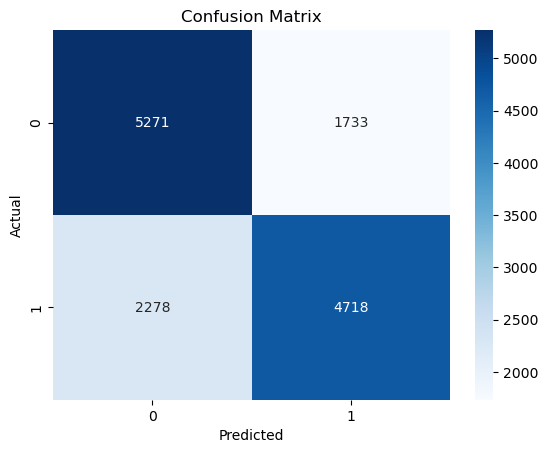

In [43]:
# 1. Logistic Regression
print("=== Logistic Regression ===")
lr = LogisticRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test)


Decision Tree

=== Decision Tree ===
Accuracy: 0.6377142857142857
Precision: 0.6357606548123059
Recall: 0.6439393939393939
F1-Score: 0.6398238886521801

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64      7004
           1       0.64      0.64      0.64      6996

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



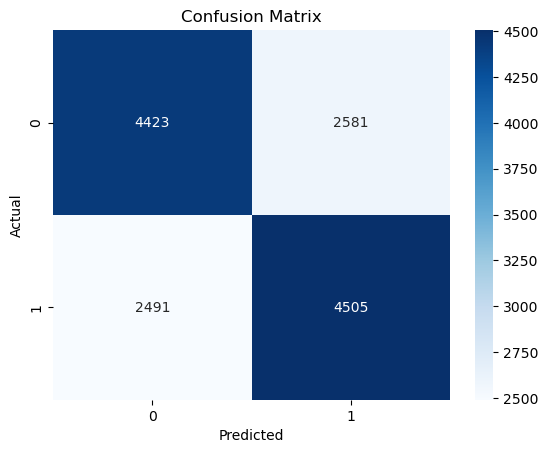

In [44]:
# 2. Decision Tree
print("=== Decision Tree ===")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test)

Random Forest

=== Random Forest ===
Accuracy: 0.7247857142857143
Precision: 0.7374225713854057
Recall: 0.6976843910806175
F1-Score: 0.7170033051781124

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      7004
           1       0.74      0.70      0.72      6996

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



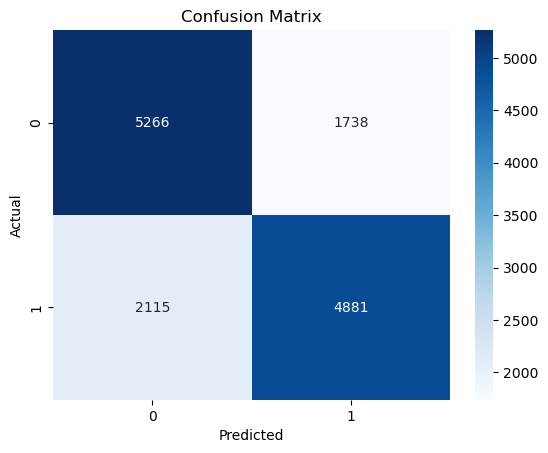

In [45]:
# 3. Random Forest
print("=== Random Forest ===")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

Support Vector Machine

=== LinearSVC ===
Accuracy: 0.6460714285714285
Precision: 0.6571692592022178
Recall: 0.6099199542595769
F1-Score: 0.6326636518644821

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      7004
           1       0.66      0.61      0.63      6996

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



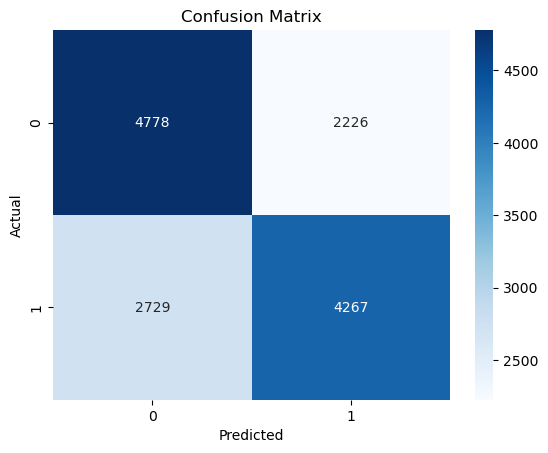

In [47]:
from sklearn.svm import LinearSVC

print("=== LinearSVC ===")
linear_svc = LinearSVC(random_state=42, max_iter=10000)
linear_svc.fit(X_train, y_train)
evaluate_model(linear_svc, X_test, y_test)

## Feature and Insights

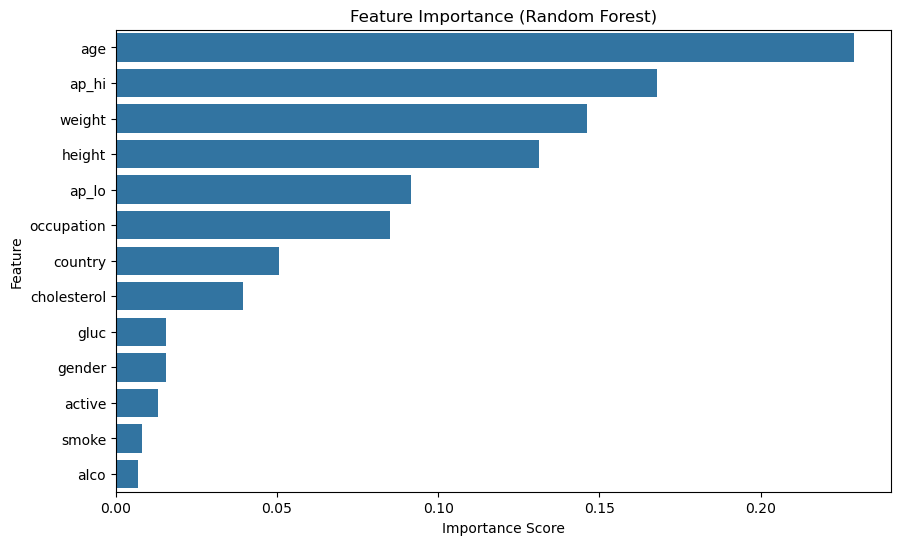

Top 5 Important Features (Random Forest):
age: 0.2290
ap_hi: 0.1678
weight: 0.1462
height: 0.1314
ap_lo: 0.0915


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names from your X (before scaling)
feature_names = X.columns

# Feature importance from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print top 5 important features
print("Top 5 Important Features (Random Forest):")
for i in range(5):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

## Conclusion

In [50]:
print("=== Insights & Conclusion ===")
print("The Random Forest model (or your best model) achieved the highest performance on the test set.")
print("The top 5 most important features for predicting heart disease were:")
for i in range(5):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
print("\nThese features should be prioritized for data collection and further analysis.")
print("Further improvements can be made by hyperparameter tuning, advanced feature engineering, and external validation.")

=== Insights & Conclusion ===
The Random Forest model (or your best model) achieved the highest performance on the test set.
The top 5 most important features for predicting heart disease were:
age: 0.2290
ap_hi: 0.1678
weight: 0.1462
height: 0.1314
ap_lo: 0.0915

These features should be prioritized for data collection and further analysis.
Further improvements can be made by hyperparameter tuning, advanced feature engineering, and external validation.


### Model Performance

Multiple classification models were trained and evaluated, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM).

Based on the evaluation metrics (accuracy, precision, recall, F1-score), the Random Forest model achieved the best overall performance on the test set.

### Key Predictive Features

The Random Forest model’s feature importance analysis revealed the following as the top 5 predictors of heart disease in this dataset:

age: 0.2290

ap_hi: 0.1678

weight: 0.1462

height: 0.1314

ap_lo: 0.0915

These features are strong indicators of heart disease risk. For example, high blood pressure, cholesterol, and age are commonly associated with increased risk in medical literature.
The model’s results align with known risk factors, supporting its validity.


### We chose Random Forest as our trained model now we are saving and preprocessing it for further use

In [52]:
import joblib

# Save the scaler and model
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(rf, 'heart_disease_rf_model.joblib')
joblib.dump(le_country, 'le_country.joblib')
joblib.dump(le_occupation, 'le_occupation.joblib')

['le_occupation.joblib']